In [2]:
import numpy as np
import bilby
import gwpy
import corner
import h5py
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [3]:
result1 = bilby.result.read_in_result("TaylorF2_3p5pn_nospin.hdf5")

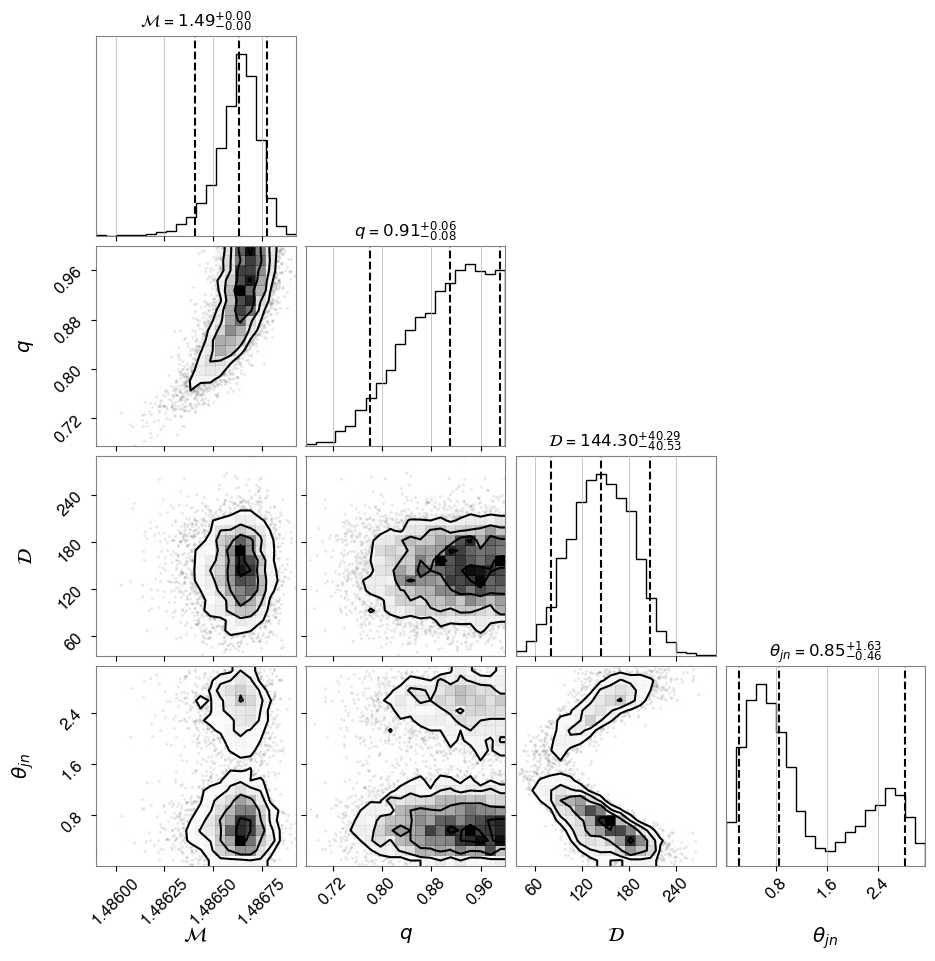

In [4]:
chirp_mass1 = result1.posterior["chirp_mass"].values
mass_ratio1 =  result1.posterior["mass_ratio"].values
theta_jn1 = result1.posterior["theta_jn"].values
D1 = result1.posterior["luminosity_distance"].values
ra1 = result1.posterior["ra"].values
dec1 = result1.posterior["dec"].values

m11 = (chirp_mass1*(1+mass_ratio1)**(1/5))/mass_ratio1**(3/5)
m21 = chirp_mass1*mass_ratio1**(2/5)*(1+mass_ratio1)**(1/5)

data1 = np.transpose(np.array([chirp_mass1,mass_ratio1,D1,theta_jn1]))
figure = corner.corner(data1, labels=[r"$\mathcal{M}$", r"$q$",r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [5]:
result2 = bilby.result.read_in_result("TaylorF2_3pn_nospin.hdf5")

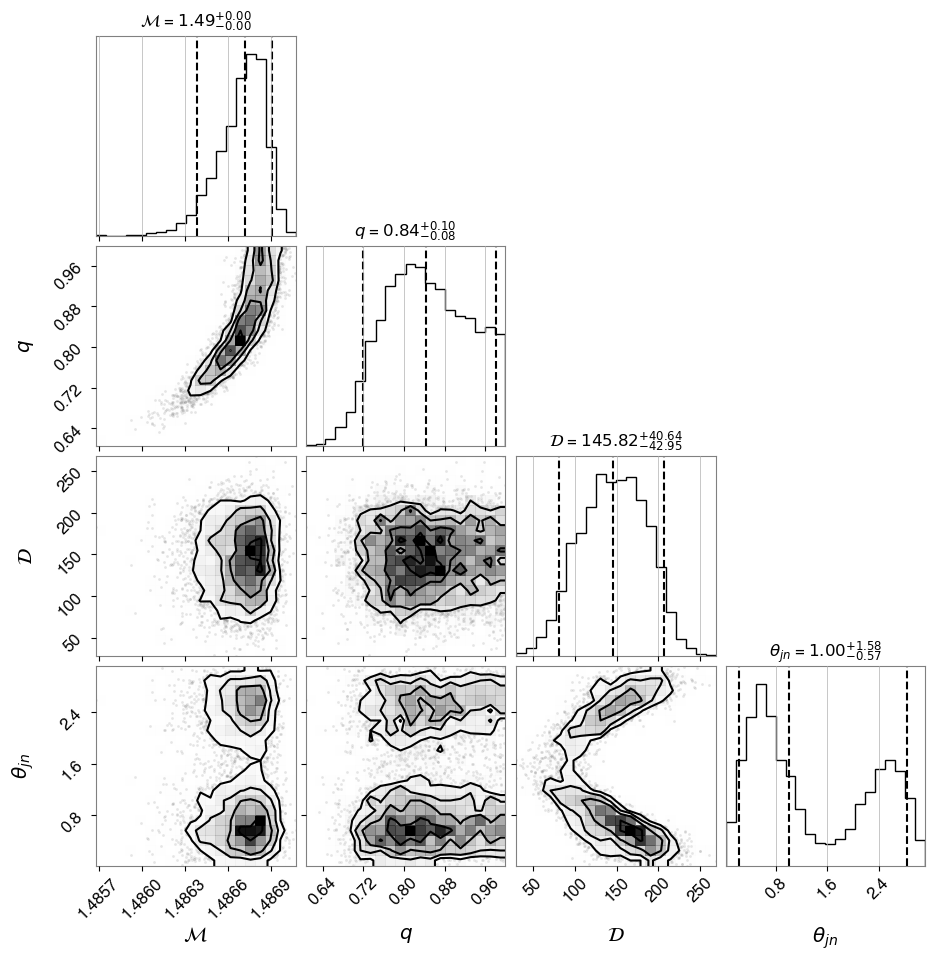

In [6]:
chirp_mass2 = result2.posterior["chirp_mass"].values
mass_ratio2 =  result2.posterior["mass_ratio"].values
theta_jn2 = result2.posterior["theta_jn"].values
D2 = result2.posterior["luminosity_distance"].values
ra2 = result2.posterior["ra"].values
dec2 = result2.posterior["dec"].values

m12 = (chirp_mass2*(1+mass_ratio2)**(1/5))/mass_ratio2**(3/5)
m22 = chirp_mass2*mass_ratio2**(2/5)*(1+mass_ratio2)**(1/5)

data2 = np.transpose(np.array([chirp_mass2,mass_ratio2,D2,theta_jn2]))
figure = corner.corner(data2, labels=[r"$\mathcal{M}$", r"$q$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

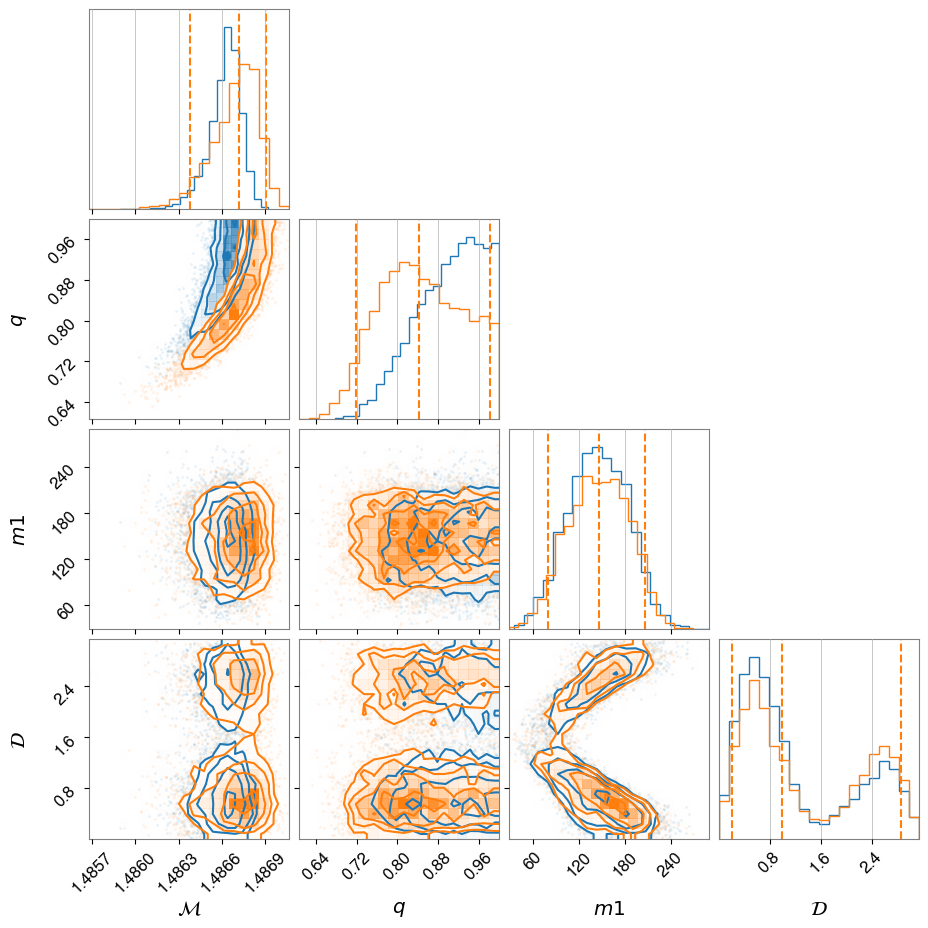

In [7]:
fig = corner.corner(data1,
                       color = 'C0')
corner.corner(data2, fig=fig, labels=[r"$\mathcal{M}$", r"$q$",r"$m1$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
              quantiles=[0.05, 0.5, 0.95],
                       color = 'C1')

#fig = corner.corner(l1_ps_1[params],color = 'C0')
#corner.corner(l1_ps_2[params],fig=fig,color='C1')

plt.show()

In [8]:
CORNER_KWARGS = dict(
    bins=30,
    smooth=0.9,
    label_kwargs=dict(fontsize=16),
    title_kwargs=dict(fontsize=16),
    #quantiles=[0.05, 0.5, 0.95],
    plot_density=False,
    plot_datapoints=False,
    fill_contours=False,
    show_titles=False,
    #density=True,
    max_n_ticks=5,
    contourf_kwargs= dict(alpha=0.4),
)

def overlaid_corner(samples_list, sample_labels):
    """Plots multiple corners on top of each other"""
    # get some constants
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    cmap = plt.cm.get_cmap('tab10', 10 )
    colors = [cmap(i) for i in range(10)]

    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )

    CORNER_KWARGS.update(range=plot_range)

    fig = corner.corner(
        samples_list[0],
        color=colors[0],
        **CORNER_KWARGS,
    )

    for idx in range(1, n):
        fig = corner.corner(
                samples_list[idx],
                fig=fig,
                weights=get_normalisation_weight(len(samples_list[idx]), max_len),
                labels=[r"$\mathcal{M}$", r"$q$", r"$D$",r"$\theta_{jn}$"],
                #labels=[r"$\mathcal{M}$", r"$q$", r"$e_0$"],
                color=colors[idx],
                **CORNER_KWARGS)
        '''if idx==3: 
            fig = corner.corner(
                samples_list[idx],
                fig=fig,
                weights=get_normalisation_weight(len(samples_list[idx]), max_len),
                labels=[r"$\mathcal{M}$", r"$q$",r"$e_0$"],
                color=colors[idx],
                **CORNER_KWARGS)
        else: 
            fig = corner.corner(
                samples_list[idx],
                fig=fig,
                weights=get_normalisation_weight(len(samples_list[idx]), max_len),
                labels=[r"$\mathcal{M}$", r"$q$",r"$e_0$"],
                color=colors[idx],
                **CORNER_KWARGS2)'''

    plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i])
            for i in range(n)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, ndim), loc="upper right"
    )
    figure = plt.gcf()
    figure.set_size_inches(7, 7)
    plt.savefig("TF2_comparision.png")
    plt.close()


def get_normalisation_weight(len_current_samples, len_of_longest_samples):
    return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)

In [9]:
overlaid_corner([data1,data2], ['3.5PN','3PN'])

In [10]:
result1.log_10_bayes_factor

18.169256508875414

In [12]:
result2.log_10_bayes_factor

18.381374960149437